# 读取模型

In [1]:
import torch
import matplotlib.pyplot as plt

from model_load import load, idx2char, device, transform
model = load()

f:\anaconda\envs\aaa\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
f:\anaconda\envs\aaa\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# 洛谷拿图预测

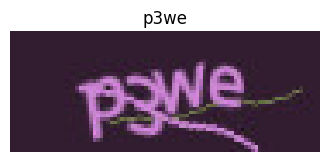

In [3]:
import requests
from io import BytesIO
from PIL import Image

page_url = 'https://www.luogu.com.cn/lg4/captcha'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)',
    'Referer': 'https://www.luogu.com.cn/'
}
response = requests.get(page_url, headers=headers, timeout=10)
response.raise_for_status()

img_pil = Image.open(BytesIO(response.content)).convert('RGB')

img_t = transform(img_pil).unsqueeze(0).to(device)

with torch.no_grad():
    outs = model(img_t)

pred_idxs = [torch.argmax(o, dim=1).item() for o in outs]
pred_str = ''.join(idx2char[i] for i in pred_idxs)

plt.figure(figsize=(4,2))
plt.imshow(img_pil)
plt.title(pred_str)
plt.axis('off')
plt.show()